In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.random.rand(100,1);X[:5]

array([[0.89826645],
       [0.91752802],
       [0.84344346],
       [0.78875914],
       [0.94515627]])

In [3]:
'''y = b + w.X + noise'''
y = 1 + 2 * X + .1 * np.random.randn(100, 1);y[:3]

array([[2.58668726],
       [2.73573208],
       [2.56382828]])

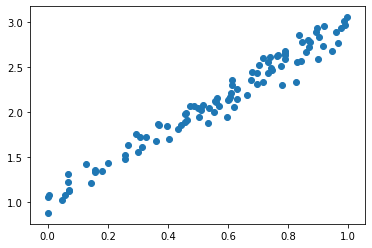

In [4]:
plt.scatter(X,y)

In [5]:
w = np.random.rand(1)
b = np.random.rand(1)

w,b

(array([0.96508924]), array([0.26617281]))

In [6]:
# Sets learning rate
lr = 1e-1
# Defines number of epochs
n_epochs = 1000

In [7]:
yhat = b + w * X

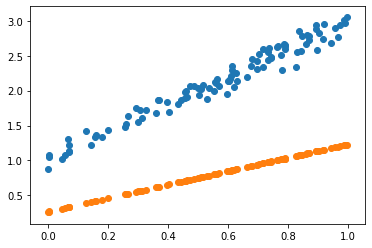

In [8]:
plt.scatter(X,y)
plt.scatter(X,yhat)

In [9]:
def update(w,b,epochs):
    for i in range(epochs):
        yhat = b + w * X
        

        error = (y - yhat)

        b_grad = -2 * error.mean()
        w_grad = -2 * (X * error).mean()

        w = w - lr * w_grad
        b = b - lr * b_grad

    return (w,b)

In [10]:
w, b = update(w,b,2000)

In [11]:
w,b

(array([1.95232492]), array([1.02727155]))

In [12]:
ynew = w*X + b

In [13]:
ynew[:3]

array([[2.78097953],
       [2.81858438],
       [2.67394724]])

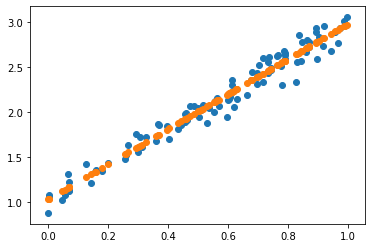

In [14]:
plt.scatter(X,y)
plt.scatter(X,ynew)

# Pytorch 

In [15]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

In [16]:
lr = 1e-1
n_epochs = 1000

In [17]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [18]:
for i in range(n_epochs):
    yhat = X*w + b
    loss = mse(yhat, y)
    
    loss.backward()
    
#     print(w.grad)
#     print(b.grad)
    
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
    w.grad.zero_()
    b.grad.zero_()
    
w,b   

(tensor([1.9523], requires_grad=True), tensor([1.0273], requires_grad=True))